<a href="https://colab.research.google.com/github/Adetowobola/Business-Funding/blob/main/Business_funding.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Exploratory Data Analysis of Business Funding

#Goal

The goal is to prepare the Business data for further analysis by applying various preprocessing techniques.

Explore the data, identify key issues and apply creative solutions to clean and transform it effectively.

Find observations from exploring the data, the steps taken to clean , preprocess and transform the data,

Justifications for each technique or decision applied,

Reflections on the importance of preprocessing in real world data analysis.


#Objective

The objective is to help preapare the data for Understanding funding patterns and probability of raising funds in future rounds.

In [4]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Encoding = latin1 is used to bypass non-UTF-8 characters to prevent getting UnicodeDecodeError

In [5]:
#loading data and checking first five rows
business_data = pd.read_csv("/content/drive/MyDrive/Business Funding Data.csv", encoding="latin1")
business_data.head(5)

,Website Domain,Effective date,Found At,Financing Type,Financing Type Normalized,Categories,Investors,Investors Count,Amount,Amount Normalized,Source Urls
0,trafigura.com,NaN,2024-03-14T01:00:00+01:00,NaN,NaN,[],NaN,NaN,$1.9b,1900000000,https://www.tradefinanceglobal.com/posts/trafi...
1,zenobe.com,NaN,2024-05-31T02:00:00+02:00,NaN,NaN,[],"avivainvestors.com, lloydsbankinggroup.com, sa...",9.0,$522.7 million,522700000,https://realassets.ipe.com/news/aviva-among-le...
2,zenobe.com,NaN,2024-07-24T02:00:00+02:00,NaN,NaN,"[""private_equity""]",NaN,NaN,£41.7m,53671000,https://www.innovationnewsnetwork.com/zenobe-a...
3,canva.com,NaN,2024-05-01T02:00:00+02:00,NaN,NaN,[],stackcapitalgroup.com,1.0,US$8 million,8000000,https://www.globenewswire.com/news-release/202...
4,fidelity.com,NaN,2024-04-11T02:00:00+02:00,NaN,NaN,[],chevychasetrust.com,1.0,$1.96 million,1960000,https://www.defenseworld.net/2024/04/11/chevy-...


In [6]:
#missing values has different forms
missing_vals = ["NaN", "[]"] #creating a list
business_data = pd.read_csv("/content/drive/MyDrive/Business Funding Data.csv", encoding="latin1", na_values=missing_vals)
business_data.head()

,Website Domain,Effective date,Found At,Financing Type,Financing Type Normalized,Categories,Investors,Investors Count,Amount,Amount Normalized,Source Urls
0,trafigura.com,NaN,2024-03-14T01:00:00+01:00,NaN,NaN,NaN,NaN,NaN,$1.9b,1900000000,https://www.tradefinanceglobal.com/posts/trafi...
1,zenobe.com,NaN,2024-05-31T02:00:00+02:00,NaN,NaN,NaN,"avivainvestors.com, lloydsbankinggroup.com, sa...",9.0,$522.7 million,522700000,https://realassets.ipe.com/news/aviva-among-le...
2,zenobe.com,NaN,2024-07-24T02:00:00+02:00,NaN,NaN,"[""private_equity""]",NaN,NaN,£41.7m,53671000,https://www.innovationnewsnetwork.com/zenobe-a...
3,canva.com,NaN,2024-05-01T02:00:00+02:00,NaN,NaN,NaN,stackcapitalgroup.com,1.0,US$8 million,8000000,https://www.globenewswire.com/news-release/202...
4,fidelity.com,NaN,2024-04-11T02:00:00+02:00,NaN,NaN,NaN,chevychasetrust.com,1.0,$1.96 million,1960000,https://www.defenseworld.net/2024/04/11/chevy-...


In [7]:
#viewing the last five rows of data
business_data.tail()

,Website Domain,Effective date,Found At,Financing Type,Financing Type Normalized,Categories,Investors,Investors Count,Amount,Amount Normalized,Source Urls
21,claritisoftware.com,2024-06-26T02:00:00+02:00,2024-06-26T02:00:00+02:00,NaN,NaN,"[""private_equity""]",cibc.com,1.0,$10 million,10000000,https://www.marketscreener.com/quote/stock/CAN...
22,biointelligence.com,NaN,2024-04-30T02:00:00+02:00,Seed,seed,"[""seed"", ""venture""]",NaN,NaN,$5 million CAD,3653000,https://betakit.com/biointelligence-technologi...
23,gaiia.com,2024-06-27T02:00:00+02:00,2024-06-27T02:00:00+02:00,Series A,series_a,"[""series_a"", ""venture""]",inovia.vc,1.0,US$13.2M,13200000,https://financialpost.com/globe-newswire/gaiia...
24,sinnstudio.com,NaN,2024-05-22T02:00:00+02:00,NaN,NaN,"[""private_equity"", ""venture""]",NaN,NaN,$2.5M,2500000,https://www.finsmes.com/2024/05/sinn-studio-ra...
25,topicflow.com,NaN,2024-06-25T02:00:00+02:00,NaN,NaN,NaN,NaN,NaN,$2.5m,2500000,https://www.streetinsider.com/Accesswire/Topic...


In [8]:
#checking data structures and information
business_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26 entries, 0 to 25
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Website Domain             26 non-null     object 
 1   Effective date             6 non-null      object 
 2   Found At                   26 non-null     object 
 3   Financing Type             8 non-null      object 
 4   Financing Type Normalized  8 non-null      object 
 5   Categories                 15 non-null     object 
 6   Investors                  13 non-null     object 
 7   Investors Count            13 non-null     float64
 8   Amount                     26 non-null     object 
 9   Amount Normalized          26 non-null     int64  
 10  Source Urls                26 non-null     object 
dtypes: float64(1), int64(1), object(9)
memory usage: 2.4+ KB


This helps show the general overview of data types, number of rows and columns, Missing values, column names etc

#Data Cleaning Justifications

This step helps Ensure Data quality

It potentially Enhances the accuracy of models

Handles data issues

It helps facilitate better insights fro the data

It helps enable better decision making

In [9]:
#addressing inconsistencies in columns names
business_data.columns = business_data.columns.str.strip().str.replace(" ", "_").str.lower()

In [10]:
business_data.columns

Index(['website_domain', 'effective_date', 'found_at', 'financing_type',
       'financing_type_normalized', 'categories', 'investors',
       'investors_count', 'amount', 'amount_normalized', 'source_urls'],
      dtype='object')

insonsitencies was addressed in the column names by changing all to lower case, removing white spaces in case of any and inputting underscores inbetween words

In [11]:
#number of rows and columns of data
print("Number of rows and columns :", business_data.shape)

Number of rows and columns : (26, 11)


#Justification for verifying duplicates

This is done to maintain data intergrity

In [12]:
#checking for duplicates values
business_data.duplicated().sum()

np.int64(0)

There are no duplicates found in the data

In [13]:
#Number of missing values
business_data.isnull().sum()

,0
website_domain,0
effective_date,20
found_at,0
financing_type,18
financing_type_normalized,18
categories,11
investors,13
investors_count,13
amount,0
amount_normalized,0


In [14]:
#percentage of missing values
#checking the percentage of missing values for each column
print(round(((business_data.isnull().sum())/(len(business_data.index)))*100),(1))

website_domain                0.0
effective_date               77.0
found_at                      0.0
financing_type               69.0
financing_type_normalized    69.0
categories                   42.0
investors                    50.0
investors_count              50.0
amount                        0.0
amount_normalized             0.0
source_urls                   0.0
dtype: float64 1


In [15]:
#checking for columns with missing values on all rows
business_data.isnull().all(axis=0).sum()

np.int64(0)

#Justification of Standardization of data time

It enables trend analysis,and trends by time.

In [16]:
#standardize date time
business_data["effective_date"] = pd.to_datetime(business_data["effective_date"], utc=True)

business_data["found_at"] = pd.to_datetime(business_data["found_at"], utc=True)

In [17]:
business_data["effective_date"] = business_data["effective_date"].dt.normalize().dt.tz_localize(None)
business_data["found_at"] = business_data["found_at"].dt.normalize().dt.tz_localize(None)

In [18]:
#dropping unneccessary columns
business_data1 = business_data.drop(columns=["effective_date", "financing_type", "amount"],axis=1)

I dropped effective_date because over 70% of data is missing , amount-column is dropped because all currencies such as British pounds, Australian dollars, canadian dollars etc has been standardized to US dollars in amount_normalized column .
financing_type column has been dropped because inconsistencies in data was addressed in financing_type_normalized_column as upper case was converted to lower case and space inbetween words changed to hyphen

In [19]:
#checking the number of unique value for each columns
for col in business_data1.columns:
  print(col, ":", business_data1[col].nunique())


website_domain : 21
found_at : 23
financing_type_normalized : 5
categories : 8
investors : 13
investors_count : 4
amount_normalized : 24
source_urls : 26


In [20]:
#filling Non available values in investors and investors count
business_data1["investors"] = business_data1["investors"].fillna("not listed")
business_data1["investors_count"] = business_data1["investors_count"].fillna(0)

I fiiled investors with not listed because they may not have been listed on the data and also the count as zero since it was not listed

In [21]:
#filling Non available values in investors and investors count
business_data1["financing_type_normalized"] = business_data1["financing_type_normalized"].fillna(business_data1["financing_type_normalized"].mode()[0])
business_data1["categories"] = business_data1["categories"].fillna(business_data1["categories"].mode()[0])

Verifying missing values is done to ensure no missing values in rows and columns . This helps data intergrity.

There are no more missing values in our data

In [22]:
#Number of missing values
business_data1.isnull().sum()

,0
website_domain,0
found_at,0
financing_type_normalized,0
categories,0
investors,0
investors_count,0
amount_normalized,0
source_urls,0


In [23]:
#checking data structures and information to verify after cleaning has been done
business_data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26 entries, 0 to 25
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   website_domain             26 non-null     object        
 1   found_at                   26 non-null     datetime64[ns]
 2   financing_type_normalized  26 non-null     object        
 3   categories                 26 non-null     object        
 4   investors                  26 non-null     object        
 5   investors_count            26 non-null     float64       
 6   amount_normalized          26 non-null     int64         
 7   source_urls                26 non-null     object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(5)
memory usage: 1.8+ KB


In [24]:
#number of rows and columns of data
print("New number of rows and columns :", business_data1.shape)

New number of rows and columns : (26, 8)


In [25]:
business_data1.describe()

,found_at,investors_count,amount_normalized
count,26,26.000000,2.600000e+01
mean,2024-05-25 23:04:36.923076864,0.923077,2.264687e+08
min,2024-03-14 00:00:00,0.000000,1.600000e+06
25%,2024-04-24 00:00:00,0.000000,4.685750e+06
50%,2024-05-26 12:00:00,0.500000,1.160000e+07
75%,2024-06-26 18:00:00,1.000000,4.750000e+07
max,2024-08-07 00:00:00,9.000000,2.000000e+09
std,NaN,1.809377,5.383239e+08


In [26]:
#creating new columns for years and months of found date which helps with funding trends over time
business_data1["found_year"] = business_data1["found_at"].dt.year
business_data1["found_month"] = business_data1["found_at"].dt.month



In [27]:
business_data1.head(27)

,website_domain,found_at,financing_type_normalized,categories,investors,investors_count,amount_normalized,source_urls,found_year,found_month
0,trafigura.com,2024-03-14,seed,"[""private_equity""]",not listed,0.0,1900000000,https://www.tradefinanceglobal.com/posts/trafi...,2024,3
1,zenobe.com,2024-05-31,seed,"[""private_equity""]","avivainvestors.com, lloydsbankinggroup.com, sa...",9.0,522700000,https://realassets.ipe.com/news/aviva-among-le...,2024,5
2,zenobe.com,2024-07-24,seed,"[""private_equity""]",not listed,0.0,53671000,https://www.innovationnewsnetwork.com/zenobe-a...,2024,7
3,canva.com,2024-05-01,seed,"[""private_equity""]",stackcapitalgroup.com,1.0,8000000,https://www.globenewswire.com/news-release/202...,2024,5
4,fidelity.com,2024-04-11,seed,"[""private_equity""]",chevychasetrust.com,1.0,1960000,https://www.defenseworld.net/2024/04/11/chevy-...,2024,4
5,swtchenergy.com,2024-04-24,series_b,"[""series_b"", ""venture""]","alantra.com, blueearth.capital",2.0,27200000,https://www.mercomindia.com/funding-and-ma-rou...,2024,4
6,carnow.com,2024-04-16,seed,"[""debt_financing""]",runwaygrowth.com,1.0,40000000,https://www.prnewswire.com/news-releases/runwa...,2024,4
7,databricks.com,2024-08-07,series_i,"[""series_i"", ""venture""]",not listed,0.0,685000000,https://iteuropa.com/news/large-language-model...,2024,8
8,anthropic.com,2024-07-08,seed,"[""private_equity""]",damachotelsandresorts.com,1.0,50000000,https://www.arabianbusiness.com/industries/tec...,2024,7
9,ey.com,2024-04-18,seed,"[""private_equity""]",not listed,0.0,6865000,https://www.biometricupdate.com/202404/ey-secu...,2024,4


In [28]:
#separting data into categorical and numerical values
num_cols = business_data1.select_dtypes(include=["number"])
cat_cols = business_data1.select_dtypes(include=["object"])

#Visualizations

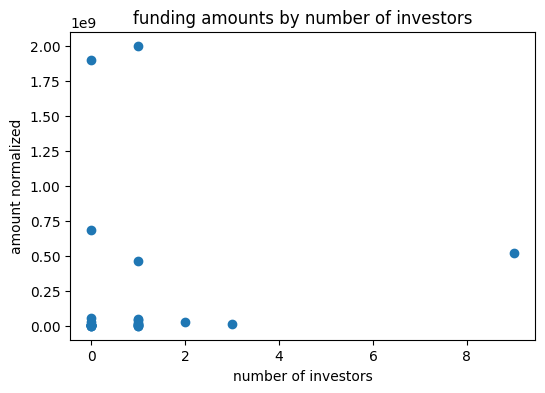

In [29]:
#visualizing funding amounts by investors using scatter plot
plt.figure(figsize=(6,4))
plt.scatter(data=business_data1, x="investors_count", y="amount_normalized")
plt.xlabel("number of investors")
plt.ylabel("amount normalized")
plt.title("funding amounts by number of investors")
plt.show()


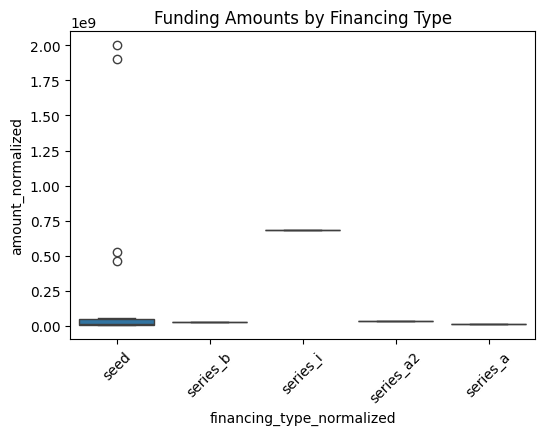

In [30]:
#visualizing funding amounts by type of finance using box plot
plt.figure(figsize=(6,4))
sns.boxplot(data=business_data1, x="financing_type_normalized", y="amount_normalized")
plt.xticks(rotation=45)
plt.title("Funding Amounts by Financing Type")
plt.show()

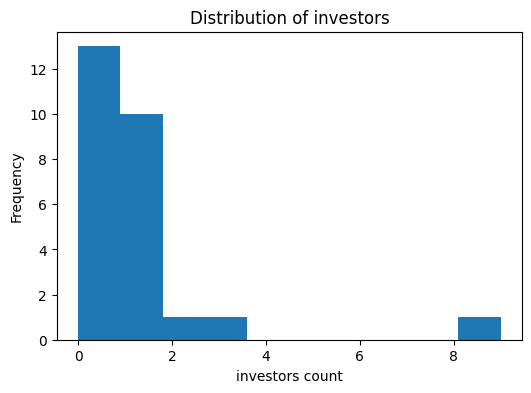

In [31]:
#visualizing Distribution of investors
plt.figure(figsize=(6,4))
plt.hist(business_data1["investors_count"])
plt.xlabel("investors count")
plt.ylabel("Frequency")
plt.title("Distribution of investors")
plt.show()



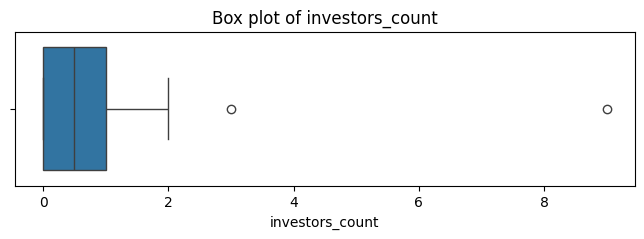

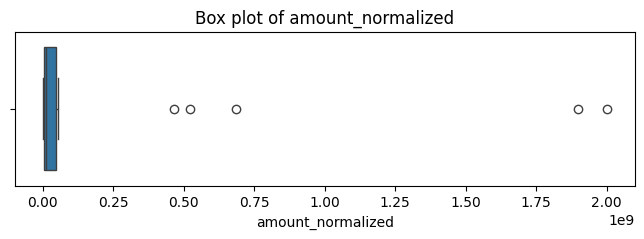

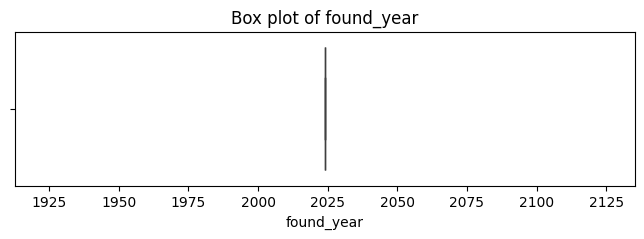

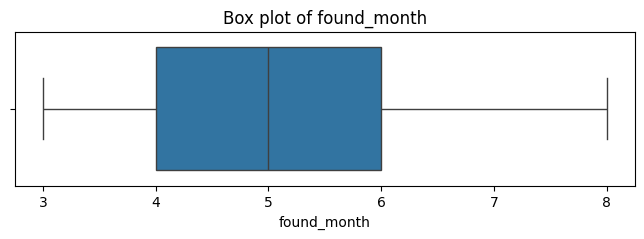

In [32]:
#plotting box plot for numerical features to detect outliers
for col in num_cols.columns:
    plt.figure(figsize=(8, 2))
    sns.boxplot(x=num_cols[col])
    plt.title(f"Box plot of {col}")
    plt.show()

In [33]:
#defining a fuunction to calculate z-scores and remove outliers
def remove_outliers(business_data1, column):

  #calculate the mean and standard deviation
  mean= business_data1[column].mean()
  std = business_data1[column].std()

  #calculate z-scores manually
  z_scores =np.abs((business_data1[column] - mean) / std)

  #filter the rows with z-scores less than 3
  df_no_of_outliers = business_data1[z_scores < 3]

  return df_no_of_outliers

In [34]:
business_data1 = remove_outliers(business_data1, "amount_normalized")
business_data1 = remove_outliers(business_data1, "investors_count")
business_data1

,website_domain,found_at,financing_type_normalized,categories,investors,investors_count,amount_normalized,source_urls,found_year,found_month
2,zenobe.com,2024-07-24,seed,"[""private_equity""]",not listed,0.0,53671000,https://www.innovationnewsnetwork.com/zenobe-a...,2024,7
3,canva.com,2024-05-01,seed,"[""private_equity""]",stackcapitalgroup.com,1.0,8000000,https://www.globenewswire.com/news-release/202...,2024,5
4,fidelity.com,2024-04-11,seed,"[""private_equity""]",chevychasetrust.com,1.0,1960000,https://www.defenseworld.net/2024/04/11/chevy-...,2024,4
5,swtchenergy.com,2024-04-24,series_b,"[""series_b"", ""venture""]","alantra.com, blueearth.capital",2.0,27200000,https://www.mercomindia.com/funding-and-ma-rou...,2024,4
6,carnow.com,2024-04-16,seed,"[""debt_financing""]",runwaygrowth.com,1.0,40000000,https://www.prnewswire.com/news-releases/runwa...,2024,4
7,databricks.com,2024-08-07,series_i,"[""series_i"", ""venture""]",not listed,0.0,685000000,https://iteuropa.com/news/large-language-model...,2024,8
8,anthropic.com,2024-07-08,seed,"[""private_equity""]",damachotelsandresorts.com,1.0,50000000,https://www.arabianbusiness.com/industries/tec...,2024,7
9,ey.com,2024-04-18,seed,"[""private_equity""]",not listed,0.0,6865000,https://www.biometricupdate.com/202404/ey-secu...,2024,4
10,openpipe.ai,2024-03-26,seed,"[""seed"", ""venture""]",not listed,0.0,6700000,https://www.geekwire.com/2024/seattle-startup-...,2024,3
12,syntetica.co,2024-07-16,seed,"[""seed"", ""venture""]",not listed,0.0,4581000,https://tech.eu/2024/07/16/syntetica-raises-eu...,2024,7


In [35]:
business_data1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 23 entries, 2 to 25
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   website_domain             23 non-null     object        
 1   found_at                   23 non-null     datetime64[ns]
 2   financing_type_normalized  23 non-null     object        
 3   categories                 23 non-null     object        
 4   investors                  23 non-null     object        
 5   investors_count            23 non-null     float64       
 6   amount_normalized          23 non-null     int64         
 7   source_urls                23 non-null     object        
 8   found_year                 23 non-null     int32         
 9   found_month                23 non-null     int32         
dtypes: datetime64[ns](1), float64(1), int32(2), int64(1), object(5)
memory usage: 1.8+ KB


#Analysis using categorical and Numerical data

In [36]:
#Analysis of categorical data
def discrete_uni_analysis(cat_cols):
  for col in cat_cols.columns:
    print("+"*10, col, "+"*10)
    print(cat_cols[col].agg(["count", "nunique", "unique"]))
    print("value counts: \n", cat_cols[col].value_counts())
    print()

In [37]:
discrete_uni_analysis(cat_cols)

++++++++++ website_domain ++++++++++
count                                                     26
nunique                                                   21
unique     [trafigura.com, zenobe.com, canva.com, fidelit...
Name: website_domain, dtype: object
value counts: 
 website_domain
zenobe.com             2
canva.com              2
biointelligence.com    2
topicflow.com          2
claritisoftware.com    2
swtchenergy.com        1
fidelity.com           1
trafigura.com          1
carnow.com             1
openpipe.ai            1
databricks.com         1
anthropic.com          1
ey.com                 1
sparelabs.com          1
zf.com                 1
syntetica.co           1
e-zinc.ca              1
heylist.com            1
qohash.com             1
gaiia.com              1
sinnstudio.com         1
Name: count, dtype: int64

++++++++++ financing_type_normalized ++++++++++
count                                                   26
nunique                                               

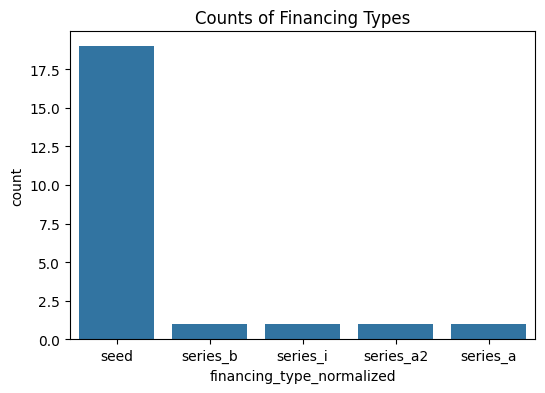

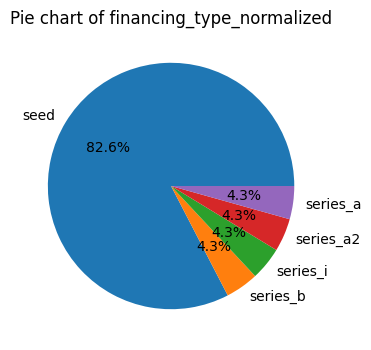

In [38]:
#visualizing the data
plt.figure(figsize=(6,4))
sns.countplot(data=business_data1, x="financing_type_normalized")
plt.title("Counts of Financing Types")
plt.show()


financing_counts = business_data1["financing_type_normalized"].value_counts()
plt.figure(figsize=(6, 4))
plt.title(f"Pie chart of financing_type_normalized")
plt.pie(financing_counts, labels=financing_counts.index, autopct="%2.1f%%")
plt.show()

Seeds has the Highest financing about 82.6% whereas other financing type all had 4.3%financing

In [39]:
def num_univariate_analysis(num_cols):
  for col in num_cols.columns:
   print("+"*10, col, "+"*10)
   print(num_cols[col].agg(["count", "min", "max", "mean", "median", "var", "std", "skew", "kurt"]))
   print()


In [40]:
num_univariate_analysis(num_cols)

++++++++++ investors_count ++++++++++
count     26.000000
min        0.000000
max        9.000000
mean       0.923077
median     0.500000
var        3.273846
std        1.809377
skew       3.854450
kurt      16.941541
Name: investors_count, dtype: float64

++++++++++ amount_normalized ++++++++++
count     2.600000e+01
min       1.600000e+06
max       2.000000e+09
mean      2.264687e+08
median    1.160000e+07
var       2.897927e+17
std       5.383239e+08
skew      2.833241e+00
kurt      7.407152e+00
Name: amount_normalized, dtype: float64

++++++++++ found_year ++++++++++
count       26.0
min       2024.0
max       2024.0
mean      2024.0
median    2024.0
var          0.0
std          0.0
skew         0.0
kurt         0.0
Name: found_year, dtype: float64

++++++++++ found_month ++++++++++
count     26.000000
min        3.000000
max        8.000000
mean       5.230769
median     5.000000
var        1.864615
std        1.365509
skew       0.160121
kurt      -0.933625
Name: found_month, dt

In [41]:
#non visual analysis correlation of numerical values
corr_matrix = business_data1[["amount_normalized", "investors_count"]].corr()
corr_matrix

,amount_normalized,investors_count
amount_normalized,1.000000,-0.062448
investors_count,-0.062448,1.000000


There is no correlation between amount_normalized and the total no of investors

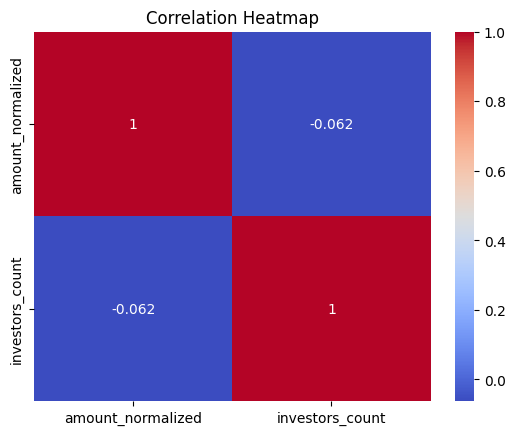

In [42]:
#visual correlation matrix
corr_matrix = business_data1[["amount_normalized", "investors_count"]].corr()
sns.heatmap(corr_matrix, annot=True, cmap = "coolwarm")
plt.title("Correlation Heatmap")
plt.show()


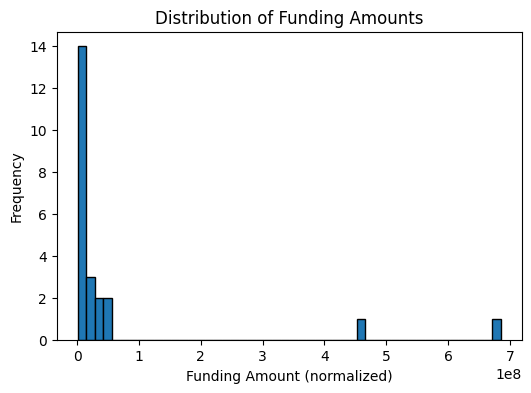

In [43]:
plt.figure(figsize=(6,4))
plt.hist(business_data1["amount_normalized"], bins=50, edgecolor="black")
plt.xlabel("Funding Amount (normalized)")
plt.ylabel("Frequency")
plt.title("Distribution of Funding Amounts")
plt.show()

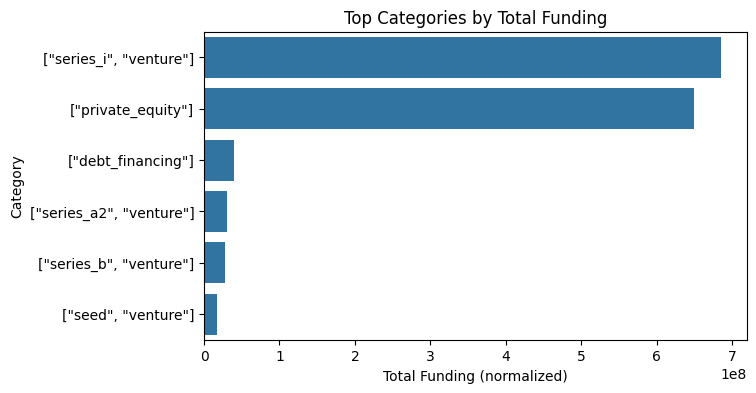

In [44]:
#visualizing categories with the most money
top_categories = business_data1.groupby("categories")["amount_normalized"].sum().sort_values(ascending=False).head(6)

plt.figure(figsize=(7,4))
sns.barplot(x=top_categories.values, y=top_categories.index)
plt.xlabel("Total Funding (normalized)")
plt.ylabel("Category")
plt.title("Top Categories by Total Funding")
plt.show()

 series i had the highest funding  followed by  private equity, The others had little funding

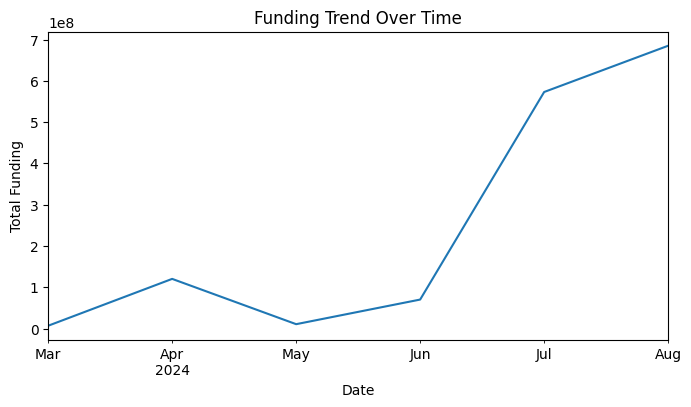

In [45]:
#Funding over time
funding_trend = business_data1.groupby(business_data1["found_at"].dt.to_period("M"))["amount_normalized"].sum()

plt.figure(figsize=(8,4))
funding_trend.plot()
plt.xlabel("Date")
plt.ylabel("Total Funding")
plt.title("Funding Trend Over Time")
plt.show()

This chart shows the funding trend from march to August 2024, Funding started very low in march with almost no funding, it rose gradually in April at about 120million USD, then drpped in May to almost 10million USD, there was a small rise in june to about 90million USD and from July onward a sharp surge to about 600 million USD , funding increased steadily reaching its highest level in August 2024 at 690million USD

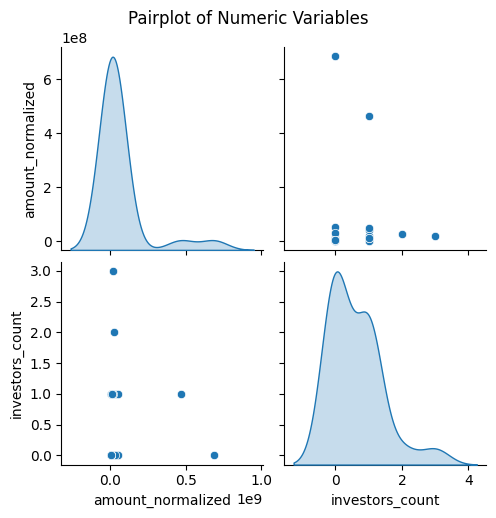

In [46]:
#showing both histograms for distributions and scaterplots for relationships at the same time
sns.pairplot(business_data1[["amount_normalized", "investors_count"]], diag_kind="kde")
plt.suptitle("Pairplot of Numeric Variables", y=1.02)
plt.show()

#Normalization

This adjusts numerical features to a unifrom range

In [47]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
business_data1["amount_normalized_minmax"] = scaler.fit_transform(
    business_data1[["amount_normalized"]]
)

#Encoding

one hot coding is used to encode text data because there is no ordinal meaning in data

In [48]:
business_data1 = pd.get_dummies(
    business_data1,
    columns=["website_domain", "financing_type_normalized", "categories", "investors", "source_urls"],
    prefix=["website", "financing", "category", "invest", "source"]
)

In [49]:
business_data1.head()

,found_at,investors_count,amount_normalized,found_year,found_month,amount_normalized_minmax,website_anthropic.com,website_biointelligence.com,website_canva.com,website_carnow.com,...,source_https://www.finsmes.com/2024/06/topicflow-raises-cad2-5m-in-funding.html,source_https://www.geekwire.com/2024/seattle-startup-openpipe-raises-6-7m-to-help-companies-reduce-costs-for-llm-development,source_https://www.globenewswire.com/news-release/2024/05/01/2873118/0/en/Stack-Capital-Invests-8-Million-USD-Into-Canva.html,source_https://www.innovationnewsnetwork.com/zenobe-awarded-41-7m-to-advance-electric-buses-in-scotland/49521,"source_https://www.marketscreener.com/quote/stock/CANADIAN-IMPERIAL-BANK-OF-1409496/news/CIBC-Innovation-Banking-Provides-10-Million-Growth-Capital-Financing-to-Clariti-47248386, https://www.finsmes.com/2024/06/clariti-receives-10m-in-financing-from-cibc-innovation-banking.html","source_https://www.mercomindia.com/funding-and-ma-roundup-ev-charging-swtch-raises-27-million, https://www.finsmes.com/2024/04/swtch-energy-raises-27-2m-in-series-b-funding.html","source_https://www.newswire.ca/news-releases/heylist-secures-1-6m-in-funding-to-make-influencer-marketing-accessible-801065350.html, https://finance.yahoo.com/news/heylist-secures-1-6m-funding-130000707.html","source_https://www.prnewswire.com/news-releases/runway-growth-capital-provides-a-40-million-growth-investment-to-carnow-302117064.html, https://www.finsmes.com/2024/04/carnow-receives-40m-loan-from-runway-growth-capital.html",source_https://www.prweb.com/releases/biointelligence-technologies-raises-5m-to-accelerate-growth-in-america-and-europe-302125188.html,source_https://www.streetinsider.com/Accesswire/Topicflow+Raises+%242.5m+to+Disrupt+Performance+Reviews+With+AI/23393680.html
2,2024-07-24,0.0,53671000,2024,7,0.076194,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False
3,2024-05-01,1.0,8000000,2024,5,0.009365,False,False,True,False,...,False,False,True,False,False,False,False,False,False,False
4,2024-04-11,1.0,1960000,2024,4,0.000527,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5,2024-04-24,2.0,27200000,2024,4,0.037460,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
6,2024-04-16,1.0,40000000,2024,4,0.056190,False,False,False,True,...,False,False,False,False,False,False,False,True,False,False


#Conclusion


I performed data cleaning by standardizing date formats, resolving inconsistencies, and handling missing values using the mode for categorical variables.

For exploration, I used visualizations such as heatmaps and scatter plots to identify relationships, and line plots to analyze trends over time.


Key findings from the dataset include:

Investors: The minimum number of investors recorded is either 0 or not listed, while the maximum is 9.


Investment Amounts: Investments range from approximately 1.6 million USD to 2 billion USD.


Financing Types: There are about five main financing types: seed, series_b, series_i, series_a2, and series_a, with seed financing receiving the highest amount.


Timeline: The earliest financing round occurred in March 2024, while the latest was in August 2024.


Financing Categories: There are eight categories of financing. The highest funded is series i, followed closely by private_equity. Other combinations include debt_financing + venture, series_a2 + venture, series_b + venture, seed + venture, series_a + venture, and private_equity + venture.


Correlation: There is no strong correlation between the investment amount and the number of investors. For example, 9 investors collectively invested 522.7 million USD.



This chart shows the funding trend from march to August 2024, Funding started very low in march with almost no funding, it rose gradually in April at about 120million USD, then drpped in May to almost 10million USD, there was a small rise in june to about 90million USD and from July onward a sharp surge to about 600 million USD , funding increased steadily reaching its highest level in August 2024 at 690million USD






Lastly, the dataset would benefit from more complete investor information, as some investors were not listed.

#Importance of Preprocessing in real world data analysis


Real-world data is messy missing values, inconsistent formats, and redundant information are common. without proper preprocessing, any analysis or machine learning model will produce misleading results.



Business Impact

clean data ensures accurate insights, better investor profiling, reliable funding trend analysis, and smarter decision-making.



Scalability

consistent, structured, and normalized data enables automation and integration with advanced analytics pipelines.